In [ ]:
import sympy
from sympy import Ellipse, Point, S, Eq, latex, plot_implicit, solve
from sympy import symbols, simplify, Rational, Matrix, Line
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex

# Практическое занятие 15
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

Указание: составить словарь с ключами - названиями ('center', 'hradius', 'vradius' и т.п.) и значениями - атрибутами эллипса (.center, .hradius, ...), затем в цикле вывести все значения атрибутов из словаря вместе с названиями, например, "hradius=3".

In [ ]:
A = Point(1,2)
el1 = Ellipse(A, hradius = 3, vradius = 2)
props = {'center': el1.center,
         'hradius': el1.hradius,
         'vradius': el1.vradius,
         'area': el1.area,
         'circumference': el1.circumference,
         'eccentricity': el1.eccentricity,
         'periapsis': el1.periapsis,
         'apoapsis': el1.apoapsis,
         'focus\_distance': el1.focus_distance,
         'foci': el1.foci}
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

**Указание:** по углу определить значение _slope аргумента метода equation (это тангенс угла наклона), использовать plot_implicit.

In [ ]:
eq2_slope = el1.equation(x = 'u', y = 'v',_slope=sympy.tan(-sympy.pi/6))
eq1_slope = el1.equation(x = 'u', y = 'v')

In [ ]:
symb_free = eq1_slope.free_symbols
dict_free = {str(a): a for a in symb_free}
dict_free['u'], dict_free['v']

(u, v)

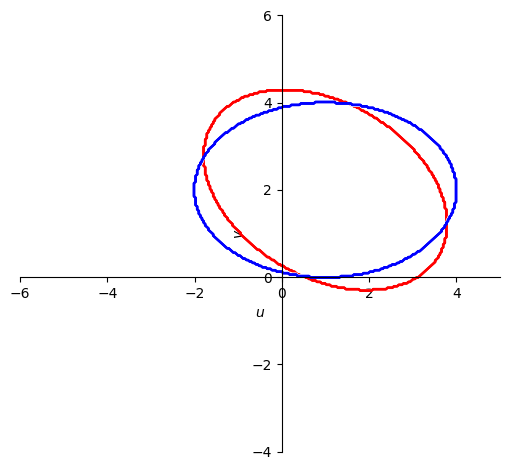

In [ ]:
p1 = plot_implicit(eq2_slope,(dict_free['u'], -6, 5), (dict_free['v'], -4, 6),

              aspect_ratio=(1, 1),
              adaptive=False,
              line_color="red", show = False)
p2 = plot_implicit(eq1_slope,(dict_free['u'], -6, 5), (dict_free['v'], -4, 6),
              aspect_ratio=(1, 1),
              adaptive=False, show = False)
p1.append(p2[0])
p1.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

**Указание:** вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы.

In [ ]:
expr = el1.equation(x='x', y='y')
eq = Eq(expr, 0)
L = Line(*el1.foci)
line = Eq(L.equation(), 0)
y, x = eq.free_symbols
a, b = [Point(*tup) for tup in solve([eq, line], (x, y))]
L1 = L.perpendicular_line(el1.center)
line = Eq(L1.equation(), 0)
c, d = [Point(*tup) for tup in solve([eq, line], (x, y))]
display("Вершины эллипса:")
display(a, b, c, d)

'Вершины эллипса:'

Point2D(-2, 2)

Point2D(4, 2)

Point2D(1, 0)

Point2D(1, 4)

Задание 4.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

x + 2

x - 4

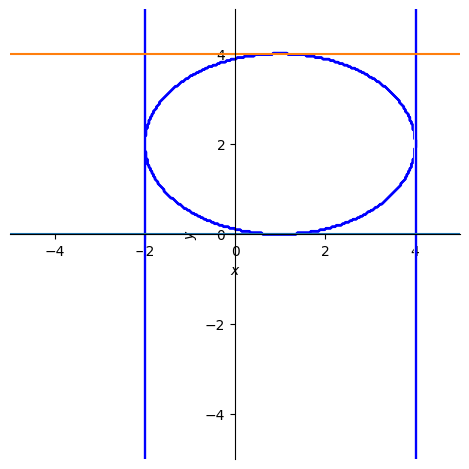

In [ ]:
p = plot_implicit(eq,
              aspect_ratio=(1, 1),
              adaptive=False, show=False)

for point in [a, b]:
    l = el1.tangent_lines(point)[0]
    display(l.equation())
    p.extend(plot_implicit(Eq(l.equation(), 0),
              aspect_ratio=(1, 1),
              adaptive=False, show=False,))
p.extend(sympy.plot_parametric(x, 0, show = False))
p.extend(sympy.plot_parametric(x, 4, show = False))
p.show()

### Задание 5**.
Построить дочерний класс эллипсов Ellipse_rot, в этом классе должна быть переменная угол поворота, по умолчанию 0 и матрица поворота rot_matr__, по умолчанию None. По умолчанию центр эллипса в начале координат, но при построении экземпляра пользователь может задать другой центр. При построении экземпляра класса пользователь должен иметь возможность задать угол поворота. Матрица поворота - внутренняя переменная, она должна изменяться только при вызове метода change_angle, изменяющего угол поворота.

**Атрибуты класса:**

**focus_distance** фокусное расстояние $c = \sqrt{a^2 - b^2}$

**foci фокусы** в виде кортежа из точек Point

**angle** угол наклона в радианах

**slope** тангенс угла наклона (None для угла, кратного $\pi / 2$, угол от $- 2 \pi$ до $2 \pi$)

**rot_matr** (не путать с rot_matr__!!!) - матрица поворота $\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right).$


**Методы:**

**change_angle** аргумент - новое значение угла поворота, метод изменяет переменную angle и матрицу поворота

**equation** возвращает уравнение эллипса, соответствующее углу поворота эллипса, у этого метода необязательные аргументы - имена переменных, по умолчанию $x$ и $y$.


Протестировать полученный класс так: создать эллипс с осями 12 и 9, центр в точке $(-1, 2)$, угол поворота $\pi / 3$, вывести на экран его эксцентриситет, фокусное расстояние, фокусы, тангенс угла наклона, матрицу поворота и уравнение. Затем заменить угол поворота на $\pi / 4$ и вывести на экран те же атрибуты и результаты работы методов, только уравнение вывести с переменными $u$ и $v$.

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки.

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

'Исходный эллипс'

Eq(5*(x - 2)**2/1728 + (y/9 + 2/9)**2, 1)

'Центр = Point2D(2, -2)'

'hradius = 24*sqrt(15)/5'

'vradius = 9'

'Фокусы: '

Point2D(2 - 21*sqrt(15)/5, -2)

Point2D(2 + 21*sqrt(15)/5, -2)

'Вершины эллипса:'

Point2D(2 - 24*sqrt(15)/5, -2)

Point2D(2 + 24*sqrt(15)/5, -2)

Point2D(2, -11)

Point2D(2, 7)

'Повернутый эллипс'

Eq(5*(x - sqrt(3)*(y + 2) - 2)**2/6912 + (y + sqrt(3)*(x - 2) + 2)**2/324, 1)

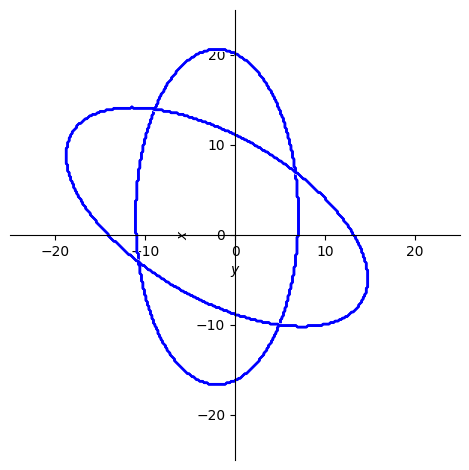

In [ ]:
Ellips = Ellipse(Point(2, -2), vradius=9, eccentricity=Rational(7, 8))
expr = Ellips.equation(x='x', y='y')
eq = Eq(expr, 0)
right_side = -expr.as_coeff_add()[0]
eq_new = Eq(expr + right_side, right_side)
display("Исходный эллипс")
display(eq_new)

props = {'Центр': Ellips.center,
         'hradius': Ellips.hradius,
         'vradius': Ellips.vradius,
}

display(*[f'{key} = {props[key]}' for key in props])
display("Фокусы: ", *Ellips.foci)

L = Line(*Ellips.foci)
line = Eq(L.equation(), 0)
y, x = eq.free_symbols
a, b = [Point(*tup) for tup in solve([eq, line], (x, y))]
L1 = L.perpendicular_line(Ellips.center)
line = Eq(L1.equation(), 0)
c, d = [Point(*tup) for tup in solve([eq, line], (x, y))]
display("Вершины эллипса:")
display(a, b, c, d)

expr_slope = Ellips.equation(_slope=sympy.tan(- sympy.pi / 3))



eq_slope = Eq(expr_slope, 0)
right_slope_side = -expr_slope.as_coeff_add()[0]
eq_slope_new = Eq(expr_slope + right_slope_side, right_slope_side)
display("Повернутый эллипс")
display(eq_slope_new)

x, y = eq.free_symbols

p = plot_implicit(eq,
              aspect_ratio=(1, 1),
              adaptive=False, show=False,
              *[(variable, -25, 25) for variable in eq.free_symbols])

p.extend(plot_implicit(eq_slope,
              aspect_ratio=(1, 1),
              adaptive=False, show=False,
              *[(variable, -25, 25) for variable in eq_slope.free_symbols]))
p.show()